# Regresión Lineal

## 1. Librerias y configuraciones previas


In [107]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from scipy import stats
import math

#Separar los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split

#Escalar Variables
from sklearn.preprocessing import MinMaxScaler

#Evaluación del modelo
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

#Creación de modelo
import statsmodels.api as sm
#from sklearn.linear_model import LinearRegression

#Factor de Inflación de la Varianza VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## 2. Funciones

In [108]:
# Función para graficar un plot con multiples gráficas del mismo tipo:
#
# df       : dataframe 
# cols     : lista de columnas a graficar
# num_cols : número de columnas 
# num_rows : número de filas
# tipo     : 'c' = countplot,   'b' = boxplot, 's' = scatterplot 
# targetVar: nombre de la variable comparativa de salida. Debe ser numérica y debe estar cotenida en el dataframe. 
#            Para countplot no es necesario (None)
# figsize  : tamaño del plot. Valor por defecto (16,8)
#
# *Nota: el número de filas * el número de columnas debe ser mayor al total de elementos de cols
#
# Ejemplos:     
#    plot_multiples_graficas (d, catCols, 5, 3, 'c', None, (16,12))
#    plot_multiples_graficas (d, numCols, 5, 3, 's', 'price', (16,12))
#    plot_multiples_graficas (d, ['make'], 1, 1, 'b', 'price', (16,12))
# ==============================================================================


def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16,8)):
    
    plt.rcParams['figure.figsize'] = figsize
    
    #num_plots = len(cols)
    #num_cols = math.ceil(np.sqrt(num_plots))
    #num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        
        if num_rows == 1:
            if num_cols == 1:
                if tipo == 'c': 
                    sns.countplot(x=df[col], ax=axs, dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs)
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs)
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[j])
        else:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=d[col], ax=axs[i], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i])
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[i, j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i, j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i, j])

In [109]:
#Función para calcular VIF (Variance Inflation Factor):

#Se Utiliza VIF para solucionar la multicolinealidad. VIF indica el grado de indecencia de esa variable. 
#Los valores de los umbrales típicos que se suelen utilizar son entre 5 y 10, siendo más exigentes los valores más bajos.

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [110]:
# Función para contruir un modelo de regresión lineal por medio de statsmodels.api

def build_model(X,y):
    
    #A los datos de entrada 'X' se le adiciona una constante
    X = sm.add_constant(X) 
    
    #Se crea y se entrena el modelo de regresion lineal q(statsmodels.api) con 
    #los datos de entrada 'X' y los datos de salida 'y'
    lm = sm.OLS(y,X).fit()
    
    #imprime el resumen del modelo creado
    print(lm.summary()) # model summary
    
    return X

In [111]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

## 3. Carga del dataset

In [112]:
#Se crea un dataframe d con los datos obtenidos de archivo de entrada
d=pd.read_csv('./datasets/01_carDetailsV4_Prep.csv')

In [113]:
## Cargar datos con colab
## =============================================================================

#from google.colab import drive 
#import os

#drive.mount('/gdrive')

In [114]:
#os.chdir("/gdrive/MyDrive/ModelosCuantitativosPython/Notebooks")
#!ls

In [115]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               1655 non-null   float64
 1   Year                1655 non-null   float64
 2   Kilometer           1655 non-null   float64
 3   Engine              1655 non-null   float64
 4   Length              1655 non-null   float64
 5   Width               1655 non-null   float64
 6   Height              1655 non-null   float64
 7   Seating Capacity    1655 non-null   float64
 8   Fuel Tank Capacity  1655 non-null   float64
 9   Fuel Type           1655 non-null   object 
 10  Transmission        1655 non-null   object 
 11  Owner               1655 non-null   object 
 12  Seller Type         1655 non-null   object 
 13  Drivetrain          1655 non-null   object 
 14  PriceRange          1655 non-null   int64  
dtypes: float64(9), int64(1), object(5)
memory usage: 194.1+

## 4. Visualización de datos

### Variables de entrada

In [117]:
#Lista de variables categóricas
catCols = d.select_dtypes(include = ["object", 'category']).columns.tolist()

d[catCols].head()

,Fuel Type,Transmission,Owner,Seller Type,Drivetrain
0,Petrol,Manual,First,Corporate,FWD
1,Diesel,Manual,Second,Individual,FWD
2,Petrol,Manual,First,Individual,FWD
3,Petrol,Manual,First,Individual,FWD
4,Diesel,Manual,First,Individual,RWD


In [118]:
#Lista de variables numéricas

numCols=d.select_dtypes(include = ['float64','float64','int32','int64']).columns.tolist()
d[numCols].head()

,Price,Year,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,PriceRange
0,505000.0000,2017.0000,87150.0000,1198.0000,3990.0000,1680.0000,1505.0000,5.0000,35.0000,1
1,450000.0000,2014.0000,75000.0000,1248.0000,3995.0000,1695.0000,1555.0000,5.0000,42.0000,1
2,220000.0000,2011.0000,67000.0000,1197.0000,3585.0000,1595.0000,1550.0000,5.0000,35.0000,1
3,799000.0000,2019.0000,37500.0000,1197.0000,3995.0000,1745.0000,1510.0000,5.0000,37.0000,3
4,1950000.0000,2018.0000,69000.0000,2393.0000,4735.0000,1830.0000,1795.0000,7.0000,55.0000,3


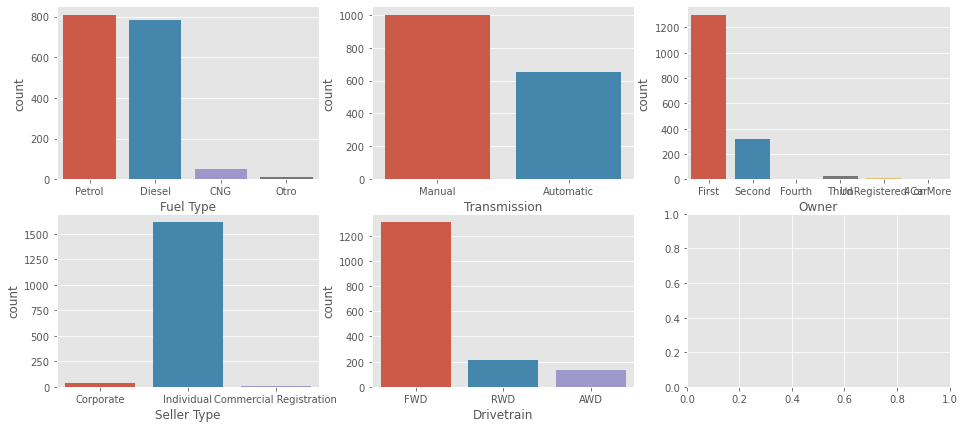

In [119]:
#Visualización de frecuencia de instancias para variables categóricas
plot_multiples_graficas(d,catCols, 3, 2, 'c', None, (16,7))

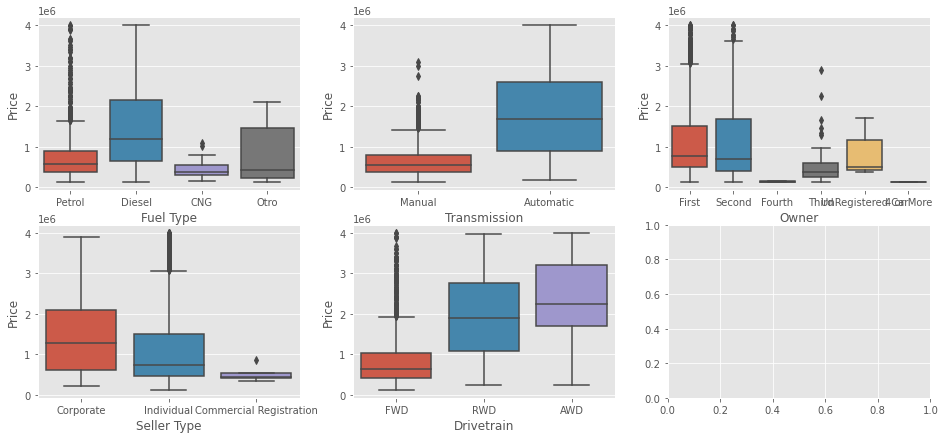

In [120]:
#Visualización por medio de gráficos de caja de bigotes para las variables categóricas con respecto al precio
plot_multiples_graficas (d, catCols, 3, 2, 'b', 'Price', (16,7))

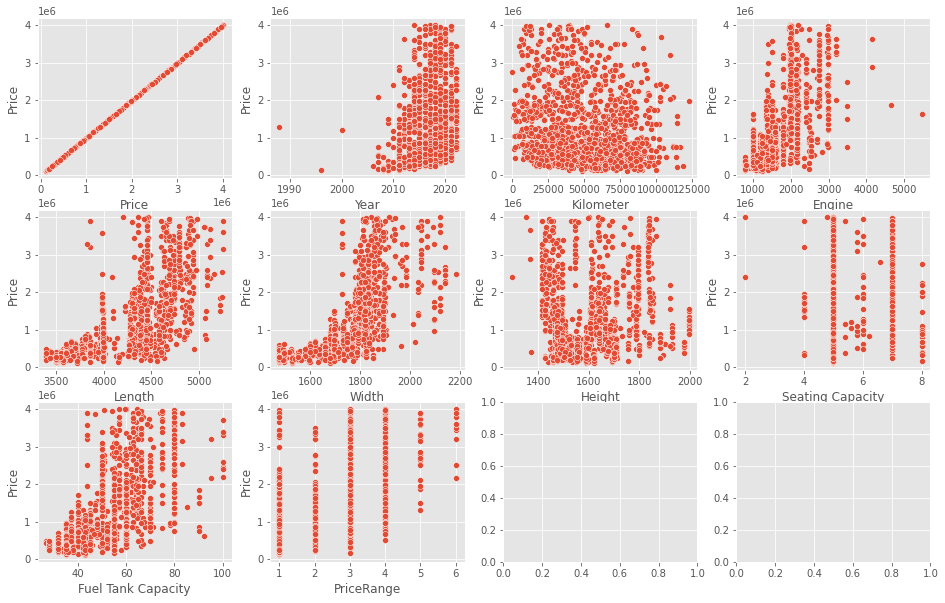

In [121]:
#Visualización de variables numéricas con respecto al precio
plot_multiples_graficas (d, numCols, 4, 3, 's', 'Price', (16,10))


#Tambien puede utilizar la funcion pairplot de seaborn
#sns.pairplot(d[numCols])
#plt.show()

In [122]:
#Eliminar la variable de salida de la lista de variable numéricas
numCols.remove('Price') 

### Variable de salida

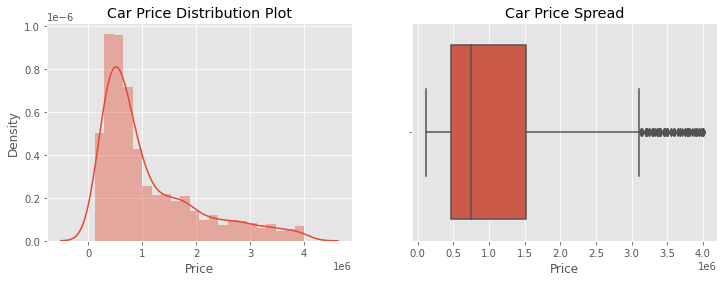

In [123]:
#Histográma y caja de bigotes del precio de los vehículos

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(d.Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(x=d.Price)

plt.show()

In [124]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

print(d.Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.95,0.975,1]))

count      1655
mean    1111698
std      910375
min      120000
25%      459999
50%      750000
75%     1525000
85%     2100000
90%     2600000
95%     3200000
97.5%   3550000
100%    4000000
max     4000000
Name: Price, dtype: float64


## 6. Preparación de datos

### Transformaciones para la variable de salida

In [125]:
#Tranformacion y = y^(1/3) Raiz cúbica

d['Price'] = np.cbrt(d['Price'])

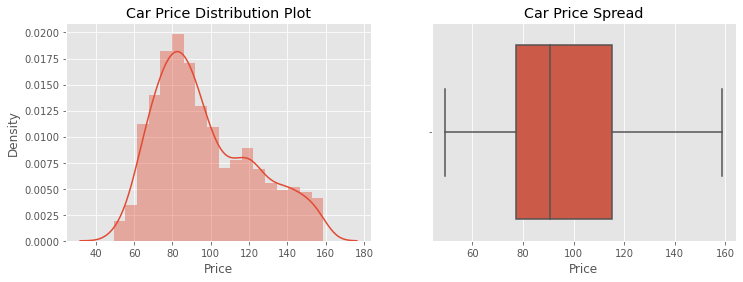

In [126]:
#Histográma y caja de bigotes del precio de los vehículos transformado

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(d.Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(x=d.Price)

plt.show()

### Transformaciones a las variables de entrada

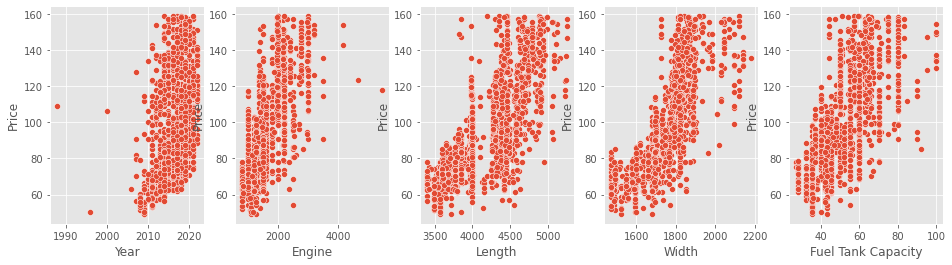

In [127]:
varTrans = ['Year','Engine','Length','Width','Fuel Tank Capacity']

plot_multiples_graficas (d, varTrans, 5, 1, 's', 'Price', (16,4))

In [128]:
# Tranformaciones X = X^2 a las variables de entrada

varTrans = ['Year','Length','Width','Fuel Tank Capacity']

for elemento in varTrans:
    d[elemento]   = d[elemento] ** 2
    

### Creación de Variables Dummies

In [129]:
# Aplicación de la función de get_dummies

d =pd.get_dummies(d, drop_first=1)

In [130]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   1655 non-null   float64
 1   Year                    1655 non-null   float64
 2   Kilometer               1655 non-null   float64
 3   Engine                  1655 non-null   float64
 4   Length                  1655 non-null   float64
 5   Width                   1655 non-null   float64
 6   Height                  1655 non-null   float64
 7   Seating Capacity        1655 non-null   float64
 8   Fuel Tank Capacity      1655 non-null   float64
 9   PriceRange              1655 non-null   int64  
 10  Fuel Type_Diesel        1655 non-null   uint8  
 11  Fuel Type_Otro          1655 non-null   uint8  
 12  Fuel Type_Petrol        1655 non-null   uint8  
 13  Transmission_Manual     1655 non-null   uint8  
 14  Owner_First             1655 non-null   

### Correlaciones

In [131]:
#Generación de la matriz de correlación
matrizCorr = d.corr()

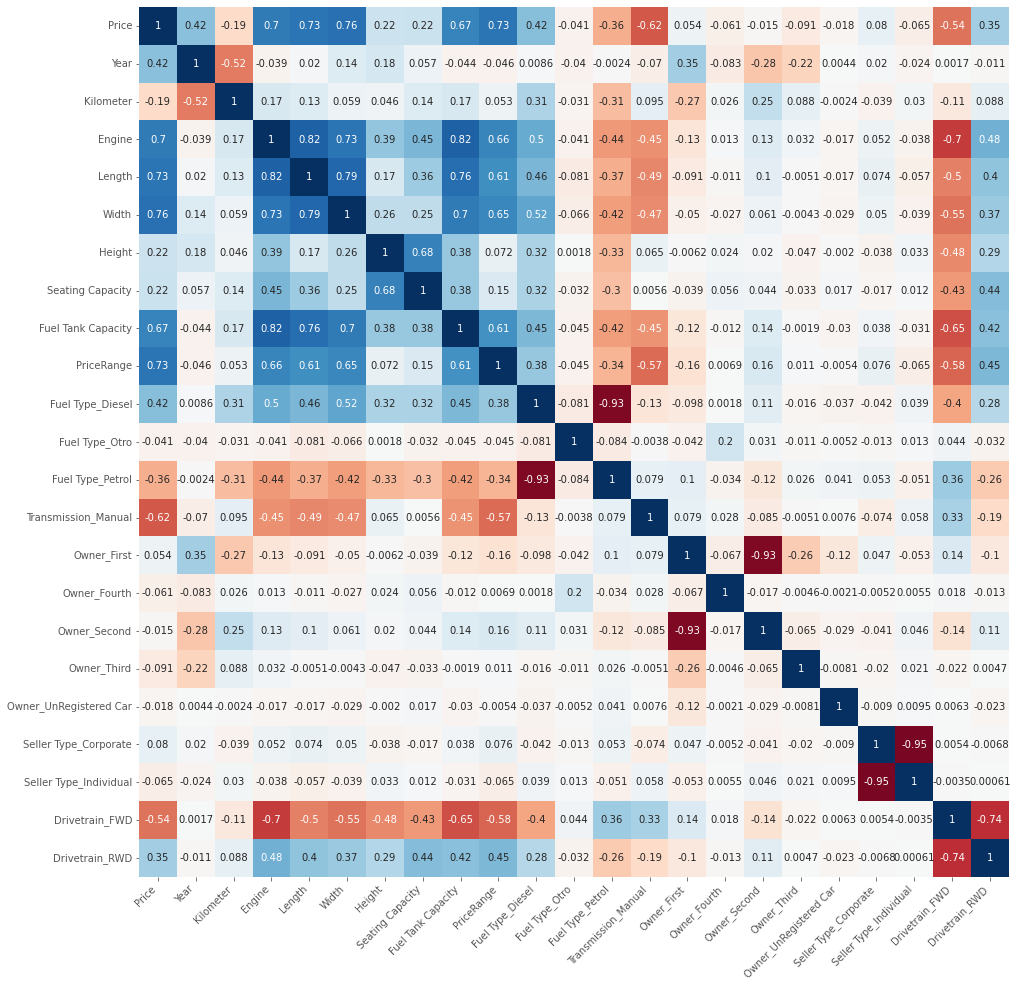

In [132]:
# Mapa de calor (Heatmap) de la matriz de correlaciones

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(26, 16))

sns.heatmap(
    matrizCorr,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = 'RdBu', #sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [133]:
#Matriz de correlación ordenada

#Creación de la matriz
df_corr= tidy_corr_matrix(matrizCorr)

#Selección de las variables correlacionadas con el precio
df_filtrado = df_corr.loc[df_corr['variable_2'] == 'Price']

#Se identifican las correlaciones más fuertes
df_filtrado[df_filtrado['abs_r']>=0.5] 

,variable_1,variable_2,r,abs_r
115,Width,Price,1,1
92,Length,Price,1,1
207,PriceRange,Price,1,1
69,Engine,Price,1,1
184,Fuel Tank Capacity,Price,1,1
299,Transmission_Manual,Price,-1,1
483,Drivetrain_FWD,Price,-1,1


In [134]:
#Cantidad de variables más relevantes extraidas a partir de la matriz de correlación ordenada
VarRelevantes = df_filtrado[df_filtrado['abs_r']>=0.5].shape[0]

#Creacion de la lista de variables más relevantes
vDep =df_filtrado['variable_1'][:VarRelevantes].tolist()
print(vDep)

['Width', 'Length', 'PriceRange', 'Engine', 'Fuel Tank Capacity', 'Transmission_Manual', 'Drivetrain_FWD']


## 7. Creación del modelo

### Dividir el conjunto de datos

In [135]:
#Se crea un dataframe de prueba de un 10% de los datos
dPrueba = d.sample(frac=0.1, random_state=1)

#se eliminan los datos de prueba del dataframe
d = d.drop(index=dPrueba.index)

In [136]:
#Se establece las variables de entrada 'X' y la variable de salida 'y'

X = d[vDep]
y = d['Price']

In [137]:
# División de los datos en train y test

#En este caso, el 80% de los datos se utilizarán para entrenar el modelo. 

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [138]:
#Se establecen las variables numéricas a escalar

#Num_vars contiene la intersección de variables de las listas numCols y vDep
num_vars = list(set(numCols) & set(vDep))

print(num_vars)

['Length', 'Fuel Tank Capacity', 'Width', 'PriceRange', 'Engine']


### Escalar Variables

In [139]:
#Escalar Variables númericas

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

X_train[num_vars].head()

,Length,Fuel Tank Capacity,Width,PriceRange,Engine
1115,0.2761,0.1699,0.3971,0.0000,0.0969
1415,0.2761,0.3097,0.4601,0.2000,0.1494
103,0.4802,0.2477,0.2745,0.2000,0.1719
1201,0.2697,0.1302,0.3116,0.8000,0.1501
907,0.5016,0.1116,0.3156,0.4000,0.1501


In [140]:
X_train.head()

,Width,Length,PriceRange,Engine,Fuel Tank Capacity,Transmission_Manual,Drivetrain_FWD
1115,0.3971,0.2761,0.0000,0.0969,0.1699,1,1
1415,0.4601,0.2761,0.2000,0.1494,0.3097,1,0
103,0.2745,0.4802,0.2000,0.1719,0.2477,0,1
1201,0.3116,0.2697,0.8000,0.1501,0.1302,0,1
907,0.3156,0.5016,0.4000,0.1501,0.1116,0,1


### Creación del modelo

In [141]:
#Llamamos la funcion build_model definida al principio de este notebook que crea y entrena el modelo

modelo_X_train = build_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     439.6
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          9.88e-324
Time:                        14:34:40   Log-Likelihood:                -4793.4
No. Observations:                1191   AIC:                             9603.
Df Residuals:                    1183   BIC:                             9643.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  78.7078    

Dado que el p-value de `Engine` es mayor a 0.05 no hay suficiente evidencia para sugerir que la variable 
independiente tiene un efecto significativo sobre la variable dependiente

In [142]:
#Se elimina la variable 'Engine'
modelo_X_train = modelo_X_train.drop(["Engine"], axis = 1)

In [143]:
#Se crea nuevamente el modelo después de eliminar la variable anterior
modelo_X_train = build_model(modelo_X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     513.3
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:34:40   Log-Likelihood:                -4793.4
No. Observations:                1191   AIC:                             9601.
Df Residuals:                    1184   BIC:                             9636.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  78.7687    

In [144]:
#Se elimina la variable 'Fuel Tank Capacity'
modelo_X_train = modelo_X_train.drop(["Fuel Tank Capacity"], axis = 1)

In [145]:
#Se crea nuevamente el modelo después de eliminar la variable anterior
modelo_X_train = build_model(modelo_X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     616.3
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:34:40   Log-Likelihood:                -4793.6
No. Observations:                1191   AIC:                             9599.
Df Residuals:                    1185   BIC:                             9630.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  79.0904    

### Colinealidad

In [146]:
#Se aplica la funcion de Factor de Inflación de la Varianza (VIF- Variance Inflation Factor) para identificar colinealidad 
#entre las variables

checkVIF(modelo_X_train)

,Features,VIF
0,const,25.6500
1,Width,3.1300
2,Length,2.9300
3,PriceRange,2.3200
5,Drivetrain_FWD,1.6300
4,Transmission_Manual,1.5200


Si existe alguna *feature* > 10 debe eliminarse. Siendo estrictos se debe eliminar aquellas variables con VIF > 5.

**Nota:** Posteriormente a la eliminación, debe verificarse los *p-values* menores a 0.05 nuevamente.

In [147]:
#Se crea nuevamente el modelo con las variables anteriormente


#Se crea y se entrena el modelo de regresion lineal q(statsmodels.api)
lm = sm.OLS(y_train,modelo_X_train).fit()

#No es necesario adicionar la constante porque los datos devuelos en la variable 'modelo_X_train' ya contiene la constante

## 8. Evaluación del modelo

### Entrenamiento

In [148]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento

#Reducción de dimensionalidad del dataset: se convierte en una dimensión
y_train = y_train.flatten()

#Se realiza la predicción sobre los datos de entrenamiento
prediccion_train = lm.predict(modelo_X_train)

#Se calculan los residuos: diferencia entre la prediccion y el valor real en los datos de entreanamiento 
residuos_train   = prediccion_train - y_train

In [149]:
# Error de Entrenamiento del modelo 


predicciones = lm.predict(exog = modelo_X_train)

mse = mean_squared_error (y_true  = y_train, y_pred  = predicciones, squared = True)
rmse = mean_squared_error (y_true  = y_train, y_pred  = predicciones, squared = False)
MAE = mean_absolute_error (y_true  = y_train, y_pred  = predicciones)
MedAE = median_absolute_error (y_true  = y_train, y_pred  = predicciones)
r2 = r2_score (y_true  = y_train, y_pred  = predicciones)

print(f"El error MSE   de test es: {mse}")
print(f"El error RMSE  de test es: {rmse}")
print(f"El error MAE   de test es: {MAE}")
print(f"El error MedAE de test es: {MedAE}")
print(f"El error R2    de test es: {r2}")

El error MSE   de test es: 183.42005646113046
El error RMSE  de test es: 13.543266092827478
El error MAE   de test es: 10.31793194105577
El error MedAE de test es: 7.892970019540655
El error R2    de test es: 0.7222387696700571


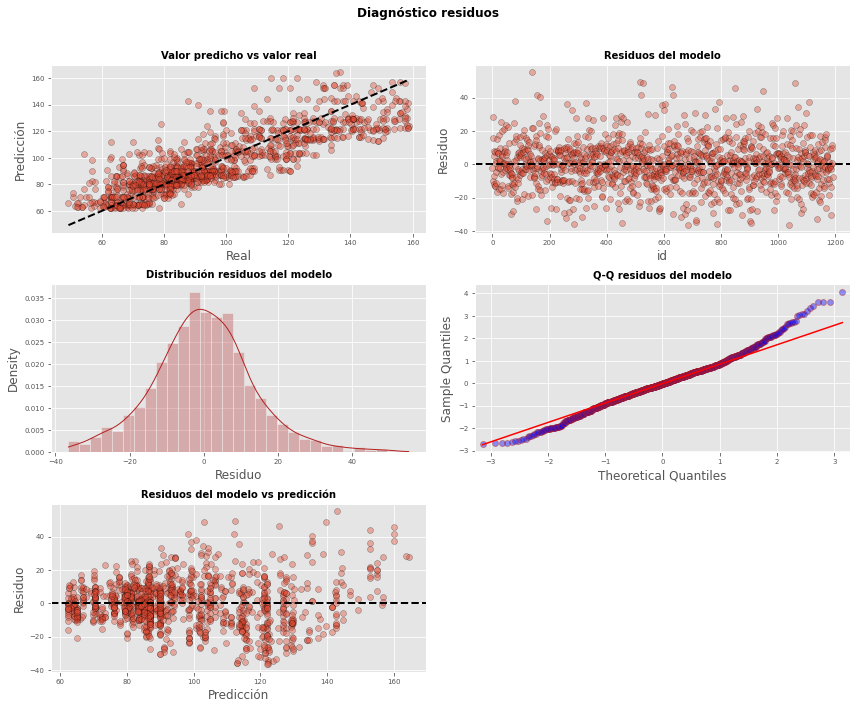

In [150]:
# Gráficos para el pronóstico de residuos

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

### Test

In [151]:
#Se extraen solo las columnas que finalmente quedaron en X_train (excluyendo constante)
X_test = X_test[modelo_X_train.columns[1:len(modelo_X_train)]] 

#Adicionamos la constante
X_test = sm.add_constant(X_test)

In [152]:
# Error de Entrenamiento del modelo 


predicciones = lm.predict(exog = X_test)

mse = mean_squared_error (y_true  = y_test, y_pred  = predicciones, squared = True)
rmse = mean_squared_error (y_true  = y_test, y_pred  = predicciones, squared = False)
MAE = mean_absolute_error (y_true  = y_test, y_pred  = predicciones)
MedAE = median_absolute_error (y_true  = y_test, y_pred  = predicciones)
r2 = r2_score (y_true  = y_test, y_pred  = predicciones)

print(f"El error MSE   de test es: {mse}")
print(f"El error RMSE  de test es: {rmse}")
print(f"El error MAE   de test es: {MAE}")
print(f"El error MedAE de test es: {MedAE}")
print(f"El error R2    de test es: {r2}")

El error MSE   de test es: 189.2574277349323
El error RMSE  de test es: 13.757086455166744
El error MAE   de test es: 10.082408058645099
El error MedAE de test es: 7.547224353678679
El error R2    de test es: 0.7026130301593143


### Prueba

In [154]:
# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
dPrueba[num_vars] = scaler.fit_transform(dPrueba[num_vars])
dPrueba.head()

,Price,Year,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,PriceRange,...,Transmission_Manual,Owner_First,Owner_Fourth,Owner_Second,Owner_Third,Owner_UnRegistered Car,Seller Type_Corporate,Seller Type_Individual,Drivetrain_FWD,Drivetrain_RWD
1198,78.8374,4068289.0000,82000.0000,0.1484,0.3114,0.3623,1500.0000,5.0000,0.0868,0.0000,...,1,1,0,0,0,0,0,1,1,0
1617,62.9961,4072324.0000,25000.0000,0.0751,0.0163,0.1075,1541.0000,5.0000,0.0075,0.0000,...,1,0,0,1,0,0,0,1,1,0
1596,69.4515,4052169.0000,64418.0000,0.1488,0.1058,0.2695,1500.0000,5.0000,0.0673,0.0000,...,0,0,0,1,0,0,0,1,1,0
1476,78.0245,4064256.0000,16630.0000,0.1484,0.1860,0.2417,1520.0000,5.0000,0.1519,0.0000,...,1,1,0,0,0,0,0,1,1,0
1123,69.0344,4056196.0000,76116.0000,0.0748,0.1007,0.1602,1560.0000,5.0000,0.0673,0.0000,...,0,1,0,0,0,0,0,1,1,0


In [160]:
#Se extraen solo las columnas que finalmente quedaron en X_train (excluyendo constant)
dPrueba1 = dPrueba[modelo_X_train.columns[1:len(modelo_X_train)]]

#Se adiciona la constante a los datos de prueba
dPrueba1 = sm.add_constant(dPrueba1) #Adding the constant

dPrueba1.head()

,const,Width,Length,PriceRange,Transmission_Manual,Drivetrain_FWD
1198,1.0000,0.3623,0.3114,0.0000,1,1
1617,1.0000,0.1075,0.0163,0.0000,1,1
1596,1.0000,0.2695,0.1058,0.0000,0,1
1476,1.0000,0.2417,0.1860,0.0000,1,1
1123,1.0000,0.1602,0.1007,0.0000,0,1


In [157]:
#Se realiza una predicción con el modelo de prueba
prediccion = lm.predict(exog = dPrueba1)


#Se crea un dataframe con con el precio calculado a partir del modelo
dfPred = pd.DataFrame(prediccion, columns=['PriceCal'])

#Se adiciona el precio del dataframe de prueba
pred= pd.merge(dfPred, dPrueba['Price'],  left_index=True, right_index=True)

#Se calcula la diferencia (el valor absoluto) entre los dos valores: el real y el encontrado con el modelo
pred['diff'] = abs(pred['Price'] - pred['PriceCal'])

pred.head(10)

,PriceCal,Price,diff
1198,86.3318,78.8374,7.4944
1617,67.1264,62.9961,4.1304
1596,89.3021,69.4515,19.8506
1476,77.5986,78.0245,0.4259
1123,84.0935,69.0344,15.0591
1013,85.6578,88.1516,2.4938
1552,70.9319,57.4890,13.4429
890,64.6168,62.1447,2.4721
1104,82.3775,79.3701,3.0075
91,105.3205,78.9979,26.3226


In [158]:
mse = mean_squared_error (y_true  = pred['Price'], y_pred  = prediccion, squared = True)
rmse = mean_squared_error (y_true  = pred['Price'], y_pred  = prediccion, squared = False)
MAE = mean_absolute_error (y_true  = pred['Price'], y_pred  = prediccion)
MedAE = median_absolute_error (y_true  = pred['Price'], y_pred  = prediccion)
r2 = r2_score (y_true  = pred['Price'], y_pred  = prediccion)

print(f"El error MSE   de test es: {mse}")
print(f"El error RMSE  de test es: {rmse}")
print(f"El error MAE   de test es: {MAE}")
print(f"El error MedAE de test es: {MedAE}")
print(f"El error R2    de test es: {r2}")

El error MSE   de test es: 178.0443465238674
El error RMSE  de test es: 13.343325916871978
El error MAE   de test es: 10.07991188470839
El error MedAE de test es: 7.218170697203291
El error R2    de test es: 0.7458388668723814


#### Referencias

- *Regresion Lineal en Python:* 
    - https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html
  
  
- *Machine learning con Python y Scikit-learn:*
    - https://www.cienciadedatos.net/documentos/py06_machine_learning_python_scikitlearn.html
    

- *scikit-learn:*    
    - https://scikit-learn.org/stable/
    - https://scikit-learn.org/stable/user_guide.html
  
  
- *Recursive Feature Elimination (RFE)*:
    - https://www.kaggle.com/goyalshalini93/car-price-prediction-linear-regression-rfe
    - https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html


- *Gráficas con  seaborn:*
    - https://ichi.pro/es/como-utilizar-python-seaborn-para-analisis-de-datos-exploratorios-28897898172180


- *Multicolinealidad:*
    - https://www.analyticslane.com/2020/04/22/solucionar-la-multicolinealidad-con-vif/


- *Analítica de grandes datos:*
    - https://jdvelasq.github.io/courses/analitica-de-grandes-datos/index.html